In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score



In [2]:
data = 'data.xlsx'

In [3]:
x1 = pd.ExcelFile(data)

In [4]:
df1 = x1.parse('Исходные данные')

In [5]:
features = df1.iloc[:,0:-2]
targets = df1.iloc[:,-2]

In [6]:
nfeatures = np.array(features)
ntargets = np.array(targets)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(nfeatures, ntargets, test_size=0.33, 
                                                    random_state=26, stratify=ntargets)

In [8]:
from sklearn.neighbors import KNeighborsClassifier

tree = DecisionTreeClassifier(max_depth=5, random_state=17)
knn = KNeighborsClassifier(n_neighbors=10)

In [9]:
tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=17, splitter='best')

In [10]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

In [11]:
from sklearn.metrics import accuracy_score

In [12]:
tree_pred = tree.predict(X_test)
accuracy_score(y_test, tree_pred)

0.6892468024632875

In [13]:
knn_pred = knn.predict(X_test)
accuracy_score(y_test, knn_pred)

0.6693510184746566

In [14]:
from sklearn.model_selection import GridSearchCV, cross_val_score

In [15]:
tree_params = {'max_depth': range(1,11),
               'max_features': range(4,19)}

In [16]:
tree_grid = GridSearchCV(tree, tree_params,
                         cv=5, n_jobs=-1,
                        verbose=True)

In [17]:
tree_grid.fit(X_train, y_train)

Fitting 5 folds for each of 150 candidates, totalling 750 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  59 tasks      | elapsed:    4.7s
[Parallel(n_jobs=-1)]: Done 659 tasks      | elapsed:   13.4s
[Parallel(n_jobs=-1)]: Done 743 out of 750 | elapsed:   14.9s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done 750 out of 750 | elapsed:   15.0s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=5,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=17,
                                              splitter='best'),
             iid='warn', n_jobs=-1,
             param_grid={'max_depth': range(1, 11),
                         'max_features': range(4, 19)},
             pre_dispatch='2*n_jobs

In [18]:

tree_grid.best_params_

{'max_depth': 4, 'max_features': 9}

In [19]:
tree_grid.best_score_

0.7030119075414429

In [20]:
accuracy_score(y_test, tree_grid.predict(X_test))

0.6911416390336333

In [21]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [22]:
knn_pipe = Pipeline([('scaler', StandardScaler()), ('knn', KNeighborsClassifier(n_jobs=-1))])

In [23]:
knn_params = {'knn__n_neighbors': range(1, 10)}

In [24]:
knn_grid = GridSearchCV(knn_pipe, knn_params,
                         cv=5, n_jobs=-1,
                        verbose=True)

In [25]:
knn_grid.fit(X_train, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:   13.5s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('scaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('knn',
                                        KNeighborsClassifier(algorithm='auto',
                                                             leaf_size=30,
                                                             metric='minkowski',
                                                             metric_params=None,
                                                             n_jobs=-1,
                                                             n_neighbors=5, p=2,
                                                             weights='uniform'))],
                                verbose=False

In [26]:

knn_grid.best_params_, knn_grid.best_score_

({'knn__n_neighbors': 8}, 0.6934391781461592)

In [27]:
accuracy_score(y_test, knn_grid.predict(X_test))

0.6788252013263856

In [28]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=17)
print(np.mean(cross_val_score(forest, X_train, y_train, cv=5)))

0.7058112483706002


In [29]:
forest_params = {'max_depth': range(1,11),
               'max_features': range(4,19)}

In [30]:
forest_grid = GridSearchCV(forest, forest_params,
                         cv=5, n_jobs=-1,
                         verbose=True)

In [31]:
forest_grid.fit(X_train, y_train)

Fitting 5 folds for each of 150 candidates, totalling 750 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    7.7s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   44.3s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 750 out of 750 | elapsed:  5.9min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=-1,
                                              oob_score=False, random_state=17,
                                              verbose=0, warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'max_dep

In [32]:
forest_grid.best_params_, forest_grid.best_score_

({'max_depth': 8, 'max_features': 18}, 0.7153864113938828)

In [33]:
accuracy_score(y_test, forest_grid.predict(X_test))

0.6982472761724301

In [34]:
import matplotlib.pyplot as plt 
plt.rc("font", size=14)

In [35]:
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [36]:
df1['STATUS'].value_counts()

0    4331
1    2063
Name: STATUS, dtype: int64

AttributeError: 'Rectangle' object has no property 'pallette'

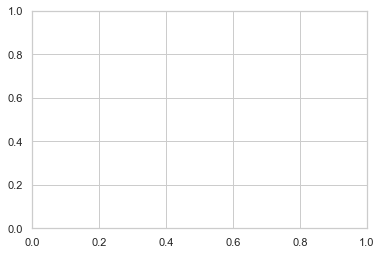

In [37]:
sns.countplot(x='STATUS', data=df1, pallette='hls')
plt.show()
plt.savefig('count_plot')

In [38]:
X_train, X_test, y_train, y_test

(array([[0.555556, 0.75    , 0.888889, ..., 2.      , 0.      , 2.      ],
        [0.756098, 0.286307, 0.853659, ..., 0.      , 2.      , 2.      ],
        [0.666667, 0.477778, 0.666667, ..., 0.      , 0.      , 0.      ],
        ...,
        [0.5     , 0.333333, 0.      , ..., 0.      , 0.      , 0.      ],
        [0.666667, 0.777778, 0.666667, ..., 0.      , 0.      , 0.      ],
        [0.5     , 0.368421, 1.      , ..., 0.      , 0.      , 0.      ]]),
 array([[0.      , 0.      , 0.      , ..., 0.      , 0.      , 0.      ],
        [0.333333, 0.576923, 0.777778, ..., 0.      , 0.      , 0.      ],
        [0.25    , 0.022321, 0.5     , ..., 0.      , 0.      , 0.      ],
        ...,
        [0.571429, 0.178042, 0.885714, ..., 2.      , 6.      , 5.      ],
        [1.      , 0.857143, 1.      , ..., 0.      , 0.      , 0.      ],
        [0.666667, 0.482759, 1.      , ..., 0.      , 0.      , 0.      ]]),
 array([0, 0, 0, ..., 1, 0, 0], dtype=int64),
 array([0, 0, 1, ..., 0,

In [39]:
from sklearn import metrics


In [40]:
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

D:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [41]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.68


In [42]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[820  21]
 [395  49]]


In [43]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.67      0.98      0.80       841
           1       0.70      0.11      0.19       444

    accuracy                           0.68      1285
   macro avg       0.69      0.54      0.49      1285
weighted avg       0.68      0.68      0.59      1285



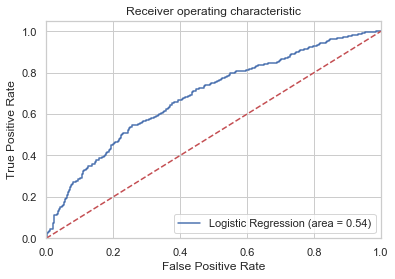

In [44]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [49]:
pd.concat([pd.DataFrame(forest.feature_importances_, index=features.columns, columns=['rfc importance']), 
           pd.DataFrame(logreg.coef_.transpose(), index=features.columns, columns=['lrc coefficients'])], axis=1)

NotFittedError: This RandomForestClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this method.

In [51]:
from sklearn.metrics import roc_curve, auc, mean_squared_error, f1_score
from scipy import interp

In [53]:
rfc = RandomForestClassifier(100, class_weight='balanced')
lrc = LogisticRegression(class_weight='balanced')

rfc.fit(X_train, y_train)
lrc.fit(X_train, y_train)

probas_rfc = rfc.predict_proba(X_test)
probas_lrc = lrc.predict_proba(X_test)

pred_rfc = rfc.predict(X_test)
pred_lrc = lrc.predict(X_test)

fpr_rfc, tpr_rfc, thresholds_rfc = roc_curve(y_test, probas_rfc[:, 1])
fpr_lrc, tpr_lrc, thresholds_lrc = roc_curve(y_test, probas_lrc[:, 1])

auc_rfc = auc(fpr_rfc, tpr_rfc)
auc_lrc = auc(fpr_lrc, tpr_lrc)

rmse_rfc = mean_squared_error(y_test.astype(int), pred_rfc)**0.5 
rmse_lrc = mean_squared_error(y_test.astype(int), pred_lrc)**0.5

fscore_rfc = f1_score(y_test, pred_rfc)
fscore_lrc = f1_score(y_test, pred_lrc)
print(rmse_rfc, rmse_lrc)

D:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.555832183615174 0.5730660252193462


In [54]:
pd.concat([pd.DataFrame(rfc.feature_importances_, index=features.columns, columns=['rfc importance']), 
           pd.DataFrame(lrc.coef_.transpose(), index=features.columns, columns=['lrc coefficients'])], axis=1)

,rfc importance,lrc coefficients
Factor_1,0.021887,-8.163370e-06
Factor_2,0.027547,-1.172634e-05
Factor_3,0.022780,-4.873721e-06
Factor_4,0.018077,-1.042051e-06
Factor_5,0.006912,5.851630e-06
Factor_6,0.016804,-1.115629e-04
Factor_7,0.015188,-8.550286e-06
Factor_8,0.019545,5.071629e-07
Factor_9,0.018430,7.296111e-07
Factor_10,0.005456,4.859522e-05
